<a href="https://colab.research.google.com/github/naoki-yoshi/Task/blob/master/task14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [ ]:
df_serect = df.loc[:,["GrLivArea","YearBuilt","SalePrice"]]
df_serect

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


## データの分析　前処理

### データの分割

In [ ]:

#データを訓練用と検証用に分割
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df_serect.iloc[:,0:2],df_serect.iloc[:,2],random_state=0)

In [ ]:
y_train

1292    107500
1018    160000
1213    145000
1430    192140
810     181000
         ...  
763     337000
835     128000
1216    112000
559     234000
684     221000
Name: SalePrice, Length: 1095, dtype: int64

### データを標準化

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_transform = scaler.transform(X_test)


In [ ]:
X_train_std

array([[ 1.64748115, -2.61683012],
       [-0.09521056,  0.6622233 ],
       [-1.08660851, -0.19894225],
       ...,
       [ 0.73740881,  0.23164052],
       [ 0.06937699,  1.05968432],
       [ 0.61542039,  0.89407556]])

### 線形回帰による学習

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_std,y_train)
y_pred = lm.predict(X_test_transform)
print(y_pred)

[264130.40861155 155093.63716252 127493.47870881 236349.8094044
 138415.02247492  68001.4401539  212572.79449248 130915.3471754
 498069.48870688 173760.0569042  200489.65236043 201591.22211132
 255410.93962238 115321.21029985 113481.85032117 145725.14931418
 242207.30250925 152306.23872418 146617.18064977 152472.84046326
 147519.02950873 148718.47833507 102874.99846127 200713.38469837
 218832.27248909 109832.22802565 216030.6801281   91825.7681413
 235642.59522153 125651.57562222 192314.4036478  228657.33272014
 127957.32550698 277648.7376309  270992.71586664 199345.14593332
 220053.54456181 118752.54138154 270519.05154509 313203.31047548
 221645.87057309 148177.86589128 195307.73266869 246124.30363549
 331201.7861278  193829.2541969   95432.80866889 124100.3529958
 203969.36124244  96413.96628138 327109.07555566 130294.71616152
 168520.65170532  77208.41247898 211577.44295734 116725.46623394
 108422.88587574 243714.87864288 132944.61052263  84595.30496386
 126339.15475833 118459.31781

### 平均二乗誤差による評価

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_test)
print("MSE ：",mean_squared_error(y_pred,y_test))

MSE ： 2725908099.0636377


### 可視化する

### GrLivAreaとSalepriceの関係

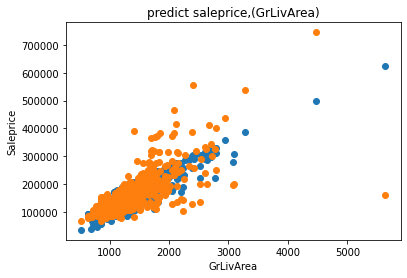

In [ ]:
plt.title("predict saleprice,(GrLivArea)")
plt.xlabel("GrLivArea")
plt.ylabel("Saleprice")
plt.scatter(X_test["GrLivArea"],y_pred)
plt.scatter(X_test["GrLivArea"],y_test)
plt.show()

### YearBuiltとSalepriceの関係

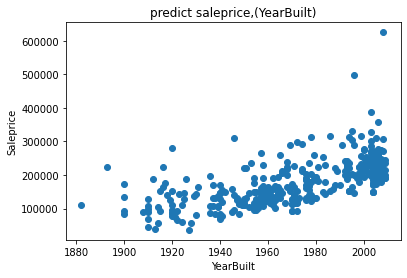

In [ ]:
plt.title("predict saleprice,(YearBuilt)")
plt.xlabel("YearBuilt")
plt.ylabel("Saleprice")
plt.scatter(X_test["YearBuilt"],y_pred)
plt.show()

## 【問題3】手法の比較

### SVM

In [ ]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train_std,y_train)
y_pred_svm = svm.predict(X_test_transform)
y_pred_svm
mean_squared_error(y_pred_svm,y_test)
print("MSE ：",mean_squared_error(y_pred_svm,y_test))

MSE ： 6943346839.259772


グラフで可視化

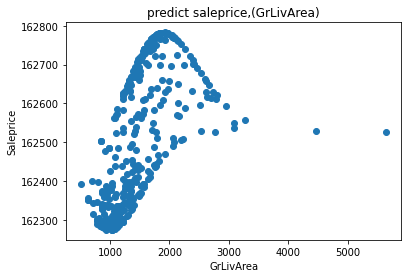

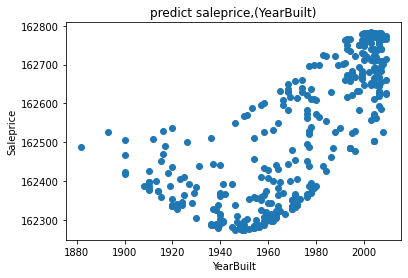

In [ ]:
plt.title("predict saleprice,(GrLivArea)")
plt.xlabel("GrLivArea")
plt.ylabel("Saleprice")
plt.scatter(X_test["GrLivArea"],y_pred_svm)
plt.show()

plt.title("predict saleprice,(YearBuilt)")
plt.xlabel("YearBuilt")
plt.ylabel("Saleprice")
plt.scatter(X_test["YearBuilt"],y_pred_svm)
plt.show()

### 決定木

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree =  DecisionTreeRegressor()
tree.fit(X_train_std,y_train)
y_pred_tree = tree.predict(X_test_transform)
mean_squared_error(y_pred_svm,y_test)
print("MSE ：",mean_squared_error(y_pred_tree,y_test))


MSE ： 3030136951.862405


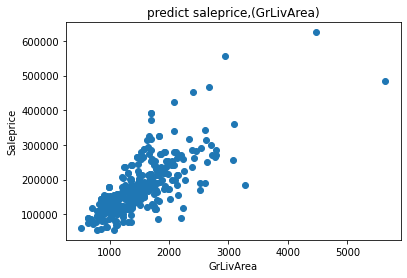

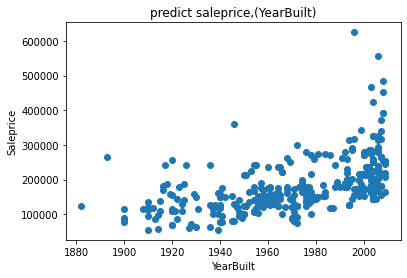

In [ ]:
plt.title("predict saleprice,(GrLivArea)")
plt.xlabel("GrLivArea")
plt.ylabel("Saleprice")
plt.scatter(X_test["GrLivArea"],y_pred_tree)
plt.show()

plt.title("predict saleprice,(YearBuilt)")
plt.xlabel("YearBuilt")
plt.ylabel("Saleprice")
plt.scatter(X_test["YearBuilt"],y_pred_tree)
plt.show()

### ランダムフォレスト

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train_std,y_train)
y_pred_random_forest = random_forest.predict(X_test_transform)
mean_squared_error(y_pred_random_forest,y_test)
print("MSE ：",mean_squared_error(y_pred_random_forest,y_test))

MSE ： 1866610067.5753772


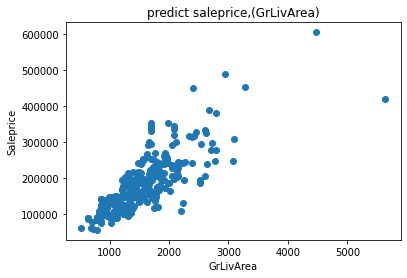

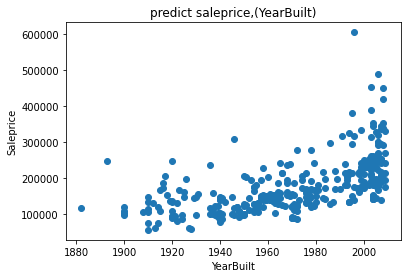

In [ ]:
plt.title("predict saleprice,(GrLivArea)")
plt.xlabel("GrLivArea")
plt.ylabel("Saleprice")
plt.scatter(X_test["GrLivArea"],y_pred_random_forest)
plt.show()

plt.title("predict saleprice,(YearBuilt)")
plt.xlabel("YearBuilt")
plt.ylabel("Saleprice")
plt.scatter(X_test["YearBuilt"],y_pred_random_forest)
plt.show()

#【問題4】（アドバンス課題）他の特徴量も使用しての学習

特徴量　ガレージエリアを追加する

In [ ]:
df_serect2 = df.loc[:,["GrLivArea","YearBuilt","GarageArea","SalePrice"]]
df_serect2

,GrLivArea,YearBuilt,GarageArea,SalePrice
0,1710,2003,548,208500
1,1262,1976,460,181500
2,1786,2001,608,223500
3,1717,1915,642,140000
4,2198,2000,836,250000
...,...,...,...,...
1455,1647,1999,460,175000
1456,2073,1978,500,210000
1457,2340,1941,252,266500
1458,1078,1950,240,142125


In [ ]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(df_serect2.iloc[:,0:3],df_serect2.iloc[:,3],random_state=0)

#ランダムフォレストを用いて学習する
random_forest.fit(X_train2,y_train2)
y_pred_rf2 = random_forest.predict(X_test2)
mean_squared_error(y_pred_rf2,y_test2)
print("MSE ：",mean_squared_error(y_pred_rf2,y_test2))

MSE ： 1597296317.2090766


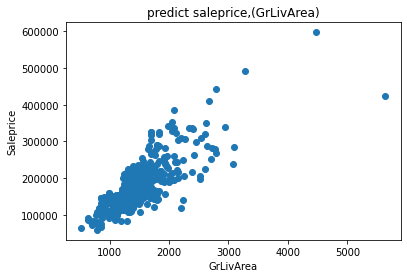

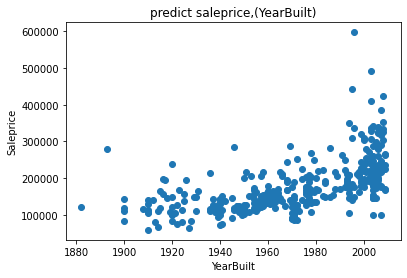

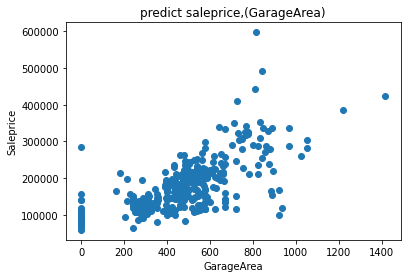

In [ ]:
plt.title("predict saleprice,(GrLivArea)")
plt.xlabel("GrLivArea")
plt.ylabel("Saleprice")
plt.scatter(X_test2["GrLivArea"],y_pred_rf2)
plt.show()

plt.title("predict saleprice,(YearBuilt)")
plt.xlabel("YearBuilt")
plt.ylabel("Saleprice")
plt.scatter(X_test2["YearBuilt"],y_pred_rf2)
plt.show()

plt.title("predict saleprice,(GarageArea)")
plt.xlabel("GarageArea")
plt.ylabel("Saleprice")
plt.scatter(X_test2["GarageArea"],y_pred_rf2)
plt.show()